This code file finds and graphs the frequencies of authors, dates, titles, and words over time. 

Author: Amy Weng 

In [40]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

directory = r'C:\Users\amycw\Desktop\ecbc research'
econFile = directory + "\\" + 'economics.csv'
restorationFile = directory + "\\" + 'restoration.csv'

Task: Examine the lapse of censorship between 1679-85 and after its end in 1695. Are there any trends in frequency and use of “consumption” related terms?

Steps: 
    1. Filter EEBO for texts from 1660-1714 that contain economic terms. (See economic.txt in Text_Files) This is Set 1. 
        *Apply topic modeling to these texts to get a more accurate dataset (?)

    2. List the frequency of authors and titles in each year from 1660 to 1714. Compare titles published between 1660-1678 (Set 1.1) and 1686-1694 (Set 1.4) to those published between 1679-85 (Set 1.2) and 1695-1714 (Set 1.3).
        *Account for duplicate titles that are not phrased in the same way. 

    3. Filter EEBO for texts from 1500-1659. This is Set 2. 
        *Apply topic modeling again (?) 

    4. Search through Set 2 for titles to compare with titles in Set 1. Compare with the different subsets of Set 1. 

Findings: 
    - EEBO only goes up to the 1690s. We either need to truncate our date range or find another database with texts from the early 18th century. 
    - Many texts have no author. 

In [44]:
def frequency(freqs, filename, item, start, end):
    readFile = pd.read_csv(filename) 
    
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        
        if (int(date) in range(start, end+1)):
            if (item == "author"):
                i = data.iloc[0].author
            if (item == "title"):
                i = data.iloc[0].title
            if (item == "date"):
                i = date
            
            if i not in freqs.keys(): 
                freqs[i] = 0
            
            freqs[i] += 1
    
    if (item == "date"):
        for year in sorted(freqs):
            print(str(year)+": "+str(freqs[year]))
    else: 
        for pair in sorted (freqs.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
            print(pair)


In [41]:
freqs = {} 
frequency(freqs, econFile,"date",1679,1685)

1679: 690
1680: 946
1681: 886
1682: 794
1683: 677
1684: 565
1685: 671


In [ ]:
frequency(restorationFile,"date",1660,1714)

In [ ]:
del(freqs)

In [ ]:
dictionary = {}

def organize(filename, item, start, end):

    readFile = pd.read_csv(filename) 
    
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        
        d = data.iloc[0].date
        
        if (int(d) in range(start, end+1)):
            if (item == "author"):
                i = data.iloc[0].author
            if (item == "title"):
                i = data.iloc[0].title
            
            if d not in dictionary.keys(): 
                dictionary[d] = {}
            
            if i not in dictionary[d].keys(): 
                dictionary[d][i] = 0
            
            dictionary[d][i] += 1
    
    for d in sorted(dictionary.keys()):
        print(d)
        for pair in sorted (dictionary[d].items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
            print(pair)
        print("\n")

In [ ]:
organize(econFile,"author",1660,1714)

In [42]:
def scatter(dates,freqs,title,color,x_label,y_label):
    xData = list(map(int, dates))
    yData = list(map(int, freqs))
    
    xyCoords=np.c_[xData,yData]
    
    uniquePoints, counts = np.unique(xyCoords, return_counts=True,axis=0)
    plt.scatter(uniquePoints[:,0],uniquePoints[:,1],s=counts*10,c=color,)

    fig = plt.gcf()
    fig.set_size_inches(15, 10)

    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    
    plt.title(title,fontsize=25)
    
    plt.show()

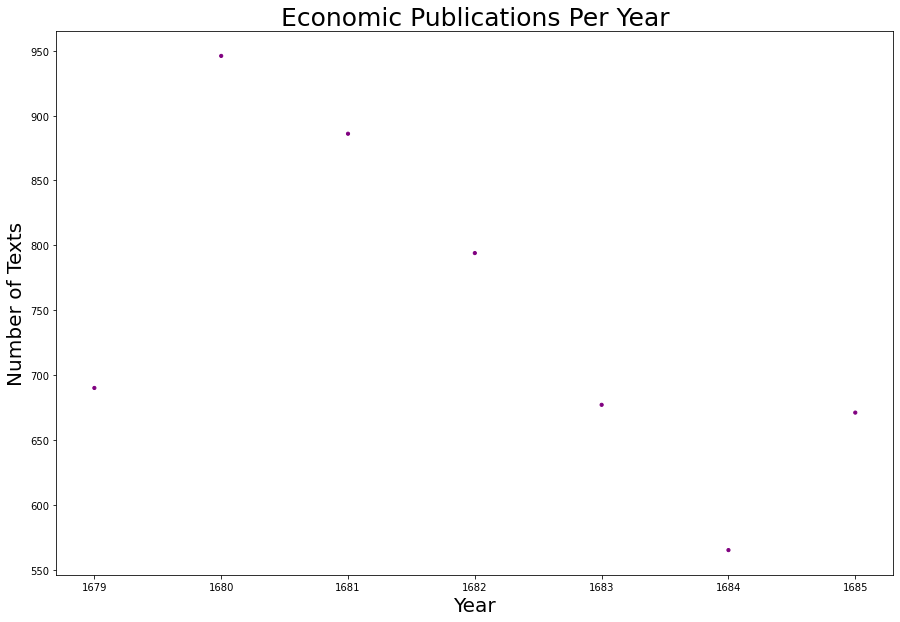

In [43]:
scatter(freqs.keys(),freqs.values(),"Economic Publications Per Year","purple","Year","Number of Texts")

In [ ]:
def scatter3D(dates, yFreq, zFreq, title, ylabel, zlabel,color):
    x = list(map(int, dates))
    y = list(map(int, yFreq))
    z = list(map(int, zFreq))

    plt.figure(figsize = (10, 10))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(x, y, z, color = color)
    
    plt.title(title)
    
    ax.set_xlabel("Year", fontweight ='bold')
    ax.set_ylabel(ylabel, fontweight ='bold')
    ax.set_zlabel(zlabel, fontweight ='bold')
    
    plt.show()

In [ ]:
def bar(xData,yData,title,xlabel,ylabel):
    if (xData == "Year"):
        xData = list(map(int, xData))
        yData = list(map(int, yData))
    
    plt.bar(xData,yData)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

In [ ]:
dates = []
freqs = []
freqDates = {}  
def freqOverTime(filename, word, start, end):
    count = 0 
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            text = data.iloc[0].text
            if (re.search(word,text)!=None): 
                count += 1
                dates.append(date)
                freqs.append(len(re.findall(lexicon,text)))
                if date not in freqDates.keys(): 
                    freqDates[date] = 0
                freqDates[date] += 1
    print("The total number of texts is "+str(count))
    for pair in sorted (freqDates.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)

In [ ]:
eic = re.compile("east india company|east-india company|east-india-company")
monopoly = re.compile('monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist|monopolizer|monopolize|monopolizes|monopolye|monopolyes')
lexicon = re.compile('pirate|pirates|piracy')

medical = re.compile("corruption|consumption|body politick|corrupt|consume|wasting|waste|blood|physician|decay|body|canker|cancer|disease|illness|remedy|cure|sickness|hepatitis|fever|spirit|brain|mind|vital|therapeutic|degeneration|degenerate|plague|smells|putrid|bad|tetrid|breathing|wholesome|healthy|unhealthy|sane|insane|nervous|languish|faculties|enfeeblement|drinks|tuberculosis|constitution|bile|black bile|yellow bile|phlegm|lung|sores|fog|smoke|diagnosis|prognosis|fiber|atrophy|morbid|mortal|mortality|nerves|inanition|defect|distemper|swelling|upset|stomach|cough|exercise|unwholesome|evacuation|fatal|fatality|vessels|hemmorrhage|bleeding|bleed|melancholy|diabetes|asthma|vomit|opiate|opium|ulcer|envy|jealousy|spoil|liver|vein|supple|heart|mouth|cured|pox")
economic = re.compile("economy|economic|oikonomike|household|price|prices|value|trade|traffic|traffique|money|bullion|exchange|luxury|spending|scarcity|plenty|east indies|corporation|west indies|carribean|india|corporation|company|merchant|merchants|plentitude|currency|calculation|public measure|consumables|superfluous|over-ballancing|over-balancing|impoverishing|gain|commerce|gold|silver|copper|ships|ship|debt|credit|debtor|creditor|decoctor|bank|usury|interest|rates|sugar|tobacco|beer|wool|uncharitable|charity|broker|monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist| monopolizer|monopolize|monopolizes|monopolye|monopolyes|importation|exportation|silk|coin|unnecessary|necessary|efficient|under-valuation|employment|immodest|immoderate|prodigality|austerity|excess|excessive|vital|artificial|goods|natural|cheap|expensive|victual|treasure|commodities|international|income|commodity|revenue|land|profitable|unprofitable|industry|work|ware|loss|transportation|balance|usurer|estate|corruptible|property|prosperity|substance|disturber|consumer|cloth|drapery|use|non-use|profusion|tea|spices|china|free trade|means|flourish")
political = re.compile("commonwealth|politick|politic|political|body politick|body politic|government|prince|war|ruler|king|queen|extortion|oppression|restoration|revolution|constitution|navy|military|army|strength|power|might|england|britain|ireland|netherlands|scotland|netherlands|dutch|spanish|germany|holy roman empire|mughal|christian|christianity|god|state|country|parliament|crisis|common|lords|lord|crisis|national|governor|public|publicke|low countries|controversy|controversies|authority|empire|bills|treatise|treatises|civilian|protection|pirates|pirate|civil war|massacre|indonesia|india|china|argier|tunis|kingdom|provincial|scandalous|scandal|majesty|subject|christiandom|enemy|turkish|ally")

# meed | mede | corrupt | corruption | bribe | bribery | presents | gifts | gifting | graft | gratuity | rewards | benefits | poison | extortion | favor | favour | gentle rewards | good turns | putrid | decay | dissolution | contamination | depravity | wickedness | corruptionem | corruptio | spoiling | seducing | destroy | seduce | perversion | vitiation | vitiare | impairment | vitium | vice | perverto | nabobs | nabob

In [ ]:
freqOverTime(econFile,lexicon,1660,1714)

In [ ]:
scatter(dates,freqs,"Pirate and Piracy in EIC texts 1660-1714","purple")

In [ ]:
bar(freqDates.keys(),freqDates.values(),"Pirate and Piracy in EIC texts 1660-1714","Year","Frequency")